## Red Wines KNN

In [32]:
#import all libraries

import numpy as np
import pandas as pd

from IPython.display import display, HTML, SVG, Image, IFrame

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [33]:
# import csv for red
# https://stackoverflow.com/questions/24606330/how-to-read-a-file-with-a-semi-colon-separator-in-pandas

red_wines = pd.read_csv("winequality-red.csv", sep=";")
red_wines

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [34]:
red_wines.corr().replace().round(3).style.background_gradient('RdBu_r')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256000,0.672000,0.115000,0.094000,-0.154000,-0.113000,0.668000,-0.683000,0.183000,-0.062000,0.124000
volatile acidity,-0.256000,1.000000,-0.552000,0.002000,0.061000,-0.011000,0.076000,0.022000,0.235000,-0.261000,-0.202000,-0.391000
citric acid,0.672000,-0.552000,1.000000,0.144000,0.204000,-0.061000,0.036000,0.365000,-0.542000,0.313000,0.110000,0.226000
residual sugar,0.115000,0.002000,0.144000,1.000000,0.056000,0.187000,0.203000,0.355000,-0.086000,0.006000,0.042000,0.014000
chlorides,0.094000,0.061000,0.204000,0.056000,1.000000,0.006000,0.047000,0.201000,-0.265000,0.371000,-0.221000,-0.129000
free sulfur dioxide,-0.154000,-0.011000,-0.061000,0.187000,0.006000,1.000000,0.668000,-0.022000,0.070000,0.052000,-0.069000,-0.051000
total sulfur dioxide,-0.113000,0.076000,0.036000,0.203000,0.047000,0.668000,1.000000,0.071000,-0.066000,0.043000,-0.206000,-0.185000
density,0.668000,0.022000,0.365000,0.355000,0.201000,-0.022000,0.071000,1.000000,-0.342000,0.149000,-0.496000,-0.175000
pH,-0.683000,0.235000,-0.542000,-0.086000,-0.265000,0.070000,-0.066000,-0.342000,1.000000,-0.197000,0.206000,-0.058000
sulphates,0.183000,-0.261000,0.313000,0.006000,0.371000,0.052000,0.043000,0.149000,-0.197000,1.000000,0.094000,0.251000


In [35]:
red_wines.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


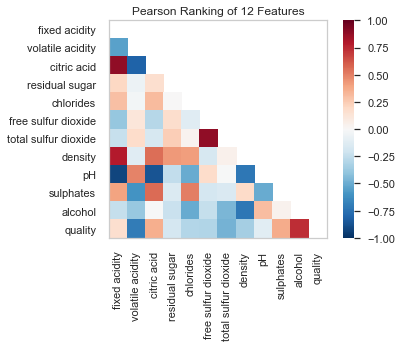

In [36]:
from yellowbrick.features import rank2d

visualizer = rank2d(red_wines.corr())

<AxesSubplot:ylabel='Frequency'>

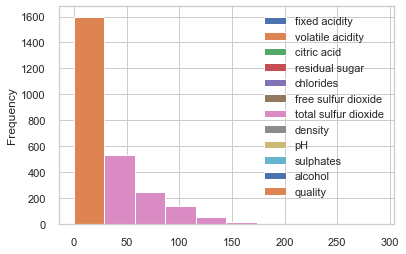

In [37]:
red_wines.plot.hist()

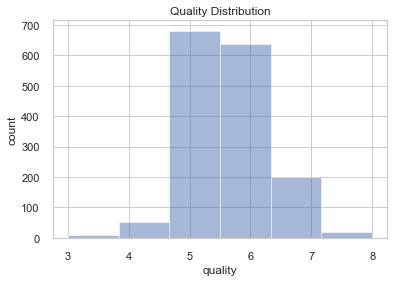

In [38]:
plt.hist(red_wines.quality, bins=6, alpha=.5)
plt.xlabel("quality")
plt.ylabel("count")
plt.title("Quality Distribution")
plt.show()

Based on a feature importance Diane did on a random forest, Alcohol, volatile acidity, sulphates, density and total sulfur dioxide came in for top 5 features. Looking at boxplot below, total sulfur dioxide has the widest range of of outliers.

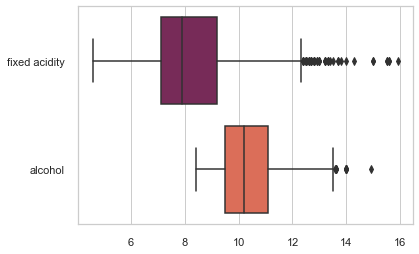

In [72]:
# Look for outliers
sns.set_theme(style="whitegrid")
ax = sns.boxplot(data=red_wines[['fixed acidity', 'alcohol']],orient="h", palette='rocket')

In [ ]:
fixed acidity	volatile acidity	citric acid	residual sugar	chlorides	free sulfur dioxide	total sulfur dioxide	density	pH	sulphates	alcohol	

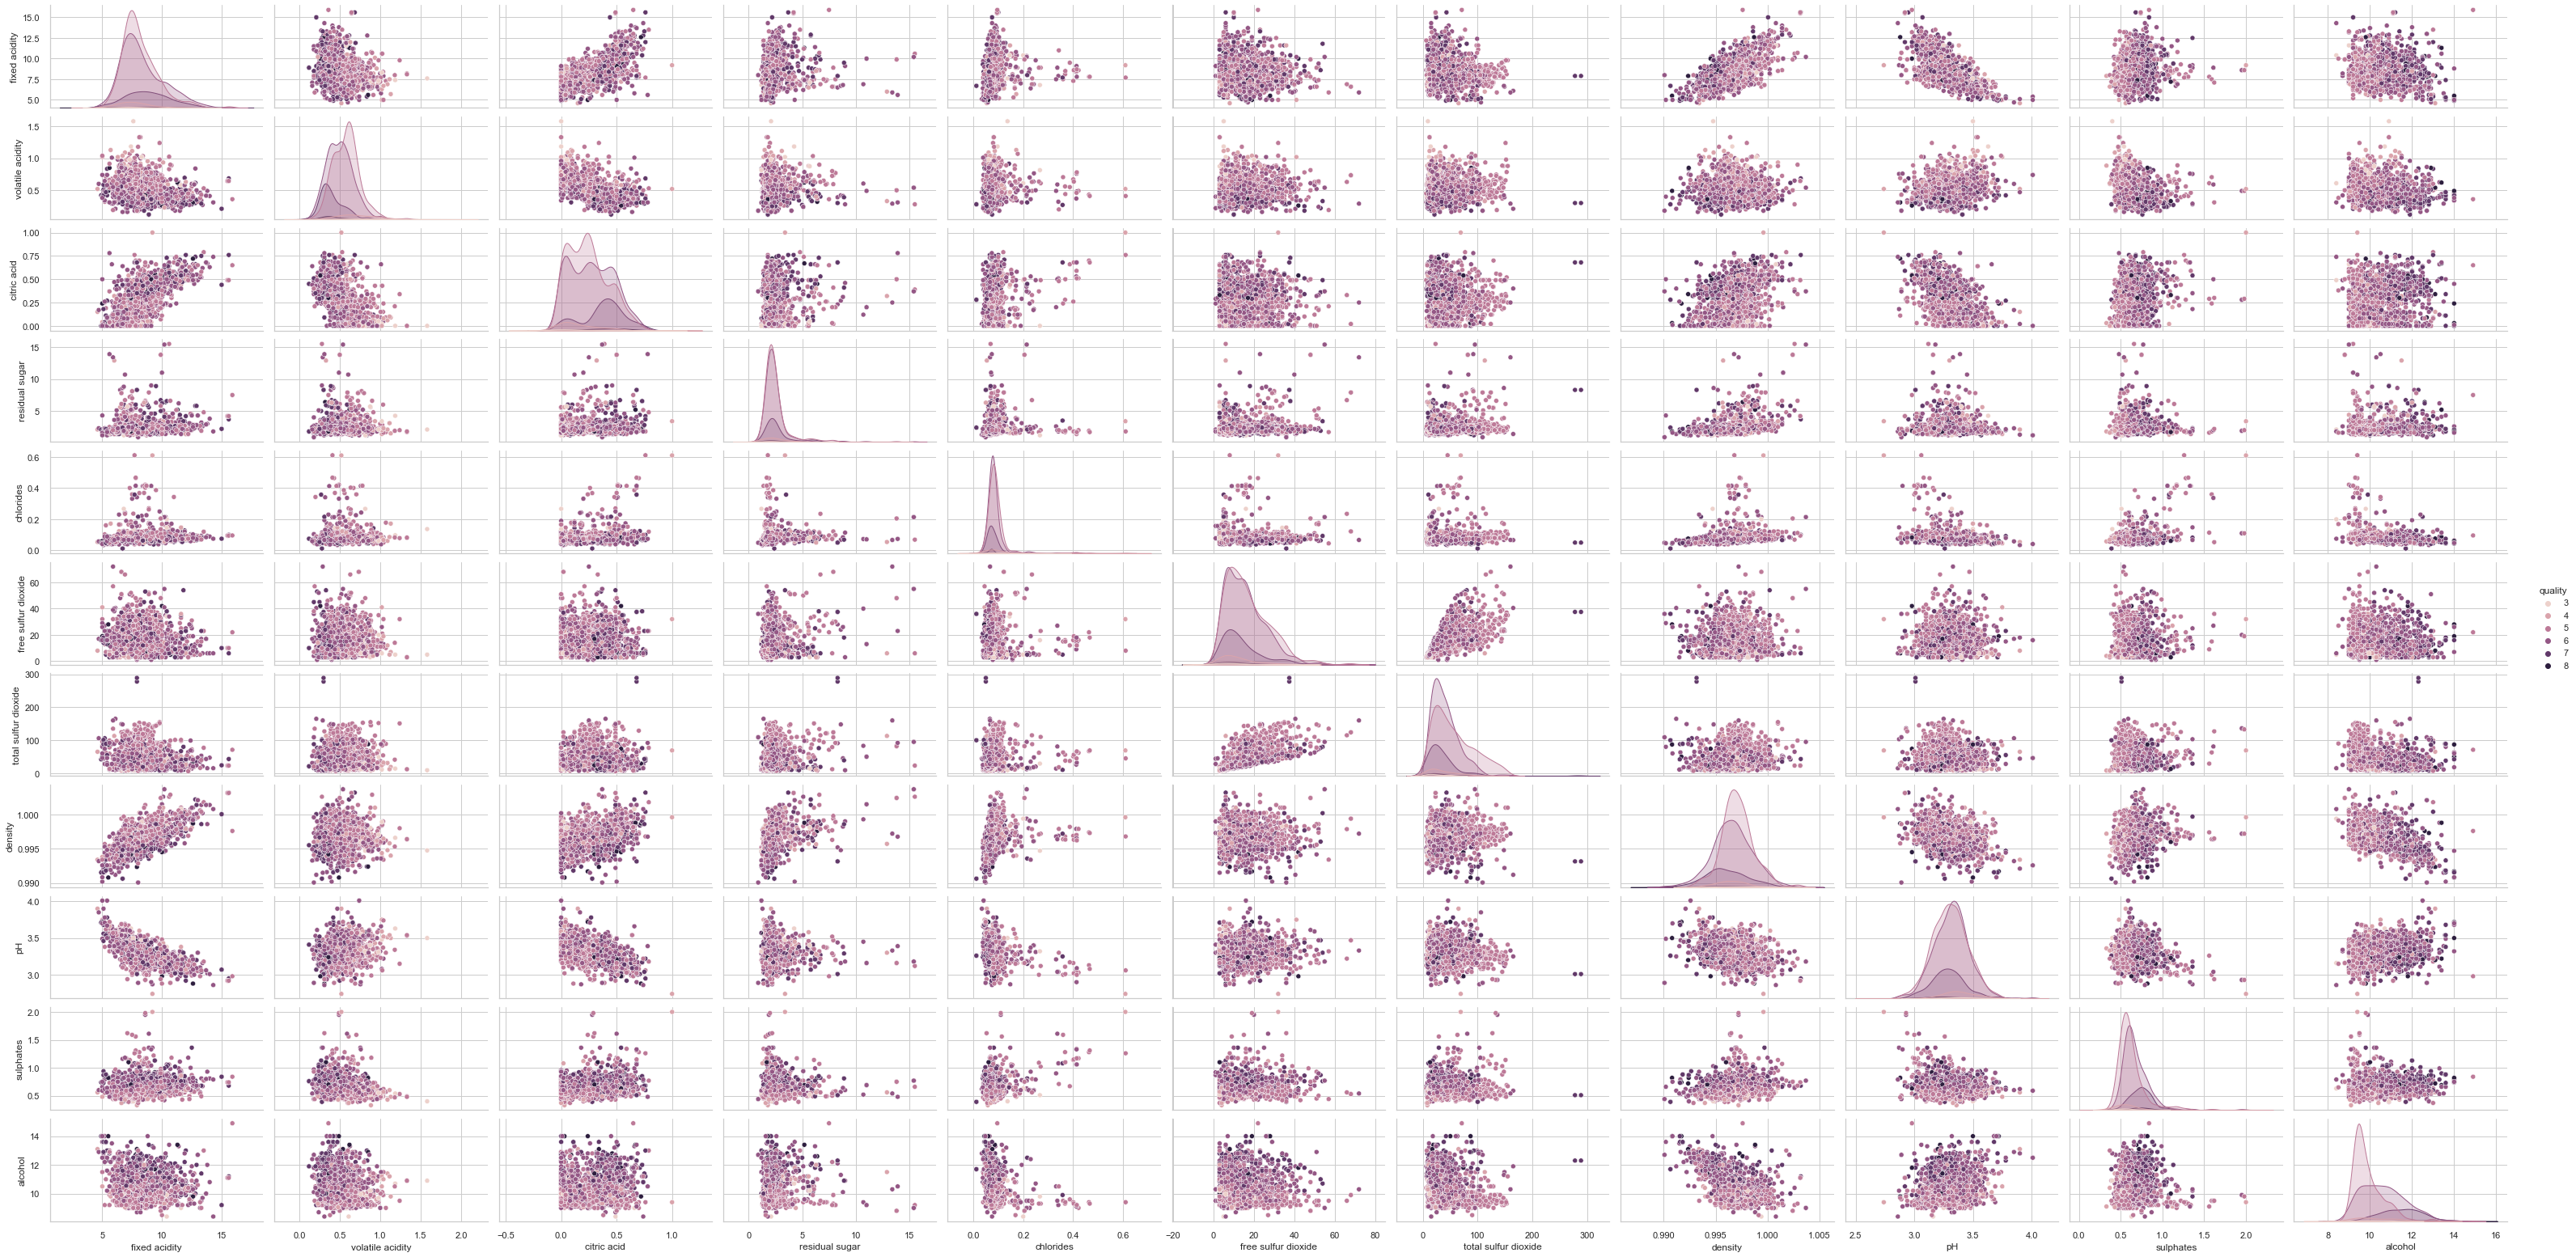

In [53]:
sns.pairplot(red_wines, hue="quality", aspect=2, height=2)

In [40]:
# Assign X & y

X = red_wines.drop(["quality"], axis=1)
y= red_wines.quality

In [41]:
# create train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.3)

In [42]:
# pre-processing (scale data)
# starting with standard scaler and will try minmaxscaler later

X_scaler= StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


## Train the Model

In [43]:
classifier = KNeighborsClassifier(n_neighbors = 3)
classifier.fit(X_train_scaled, y_train)

predictions = classifier.predict(X_test_scaled)
print(predictions)
print(classifier.classes_)

[5 5 6 5 6 5 5 5 6 6 7 6 6 5 6 7 5 7 7 5 4 6 6 6 5 6 6 6 5 6 5 5 5 5 5 5 6
 6 6 5 5 5 6 5 6 6 7 6 5 7 5 5 6 7 5 4 6 5 6 5 6 6 6 5 7 5 6 6 7 6 6 6 5 6
 6 5 7 5 6 7 5 7 5 5 6 6 5 6 7 6 6 5 5 5 5 6 5 6 5 5 6 5 6 6 6 6 6 5 5 5 6
 5 7 5 5 6 6 5 5 6 6 5 7 6 6 6 7 5 5 6 5 5 5 6 7 5 5 5 6 6 6 5 7 4 6 5 5 4
 5 5 6 6 5 5 5 6 5 5 5 6 7 6 6 5 5 6 4 5 5 5 5 5 7 6 5 6 6 5 6 5 4 5 6 7 5
 6 6 6 7 6 6 6 5 7 5 5 5 6 5 6 5 5 5 5 7 6 5 6 5 5 5 5 5 6 6 7 6 5 6 6 6 6
 7 6 4 5 6 7 6 5 6 4 7 5 5 6 5 6 6 5 6 5 5 6 5 5 5 6 6 5 5 5 6 6 3 5 5 4 6
 6 7 5 5 7 6 5 6 5 5 7 5 6 5 6 6 5 6 6 6 6 7 6 5 5 5 5 5 5 6 6 5 7 5 6 5 6
 5 7 6 7 6 5 6 5 6 5 6 6 6 7 6 4 4 5 5 6 5 5 6 6 7 7 6 4 3 5 6 6 4 6 6 7 5
 6 6 6 5 6 5 6 6 7 5 6 6 6 6 5 6 5 6 6 5 5 6 7 6 6 6 5 5 5 5 6 5 7 6 6 5 5
 5 5 6 6 6 5 5 7 6 5 5 6 7 6 5 7 7 5 5 6 5 5 5 5 6 6 7 5 6 6 5 5 6 5 6 6 6
 7 5 5 6 7 6 6 6 7 5 7 5 6 7 5 6 6 6 5 5 5 6 5 7 6 5 5 6 5 5 6 5 6 6 6 6 5
 6 5 5 5 5 5 7 5 5 5 5 6 7 6 6 4 5 4 5 5 6 5 6 6 6 7 6 6 6 6 5 5 5 6 7 5]
[3 4 5 6 7 8]


In [44]:
print(f"Training Data Score: {classifier.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test_scaled, y_test)}")

Training Data Score: 0.7783735478105451
Testing Data Score: 0.5354166666666667


In [45]:
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))


[[  0   0   0   1   0   0]
 [  1   2   5   9   0   0]
 [  1   5 127  59   3   0]
 [  0   8  66 102  24   0]
 [  0   0   7  28  26   0]
 [  0   0   1   1   4   0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.13      0.12      0.12        17
           5       0.62      0.65      0.63       195
           6       0.51      0.51      0.51       200
           7       0.46      0.43      0.44        61
           8       0.00      0.00      0.00         6

    accuracy                           0.54       480
   macro avg       0.29      0.28      0.28       480
weighted avg       0.53      0.54      0.53       480



C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Hyper Parameter Tuning


k: 1, Train/Test Score: 1.000/0.623
k: 3, Train/Test Score: 0.778/0.535
k: 5, Train/Test Score: 0.706/0.571
k: 7, Train/Test Score: 0.684/0.567
k: 9, Train/Test Score: 0.674/0.577
k: 11, Train/Test Score: 0.661/0.565
k: 13, Train/Test Score: 0.652/0.537
k: 15, Train/Test Score: 0.651/0.546
k: 17, Train/Test Score: 0.632/0.542
k: 19, Train/Test Score: 0.634/0.540


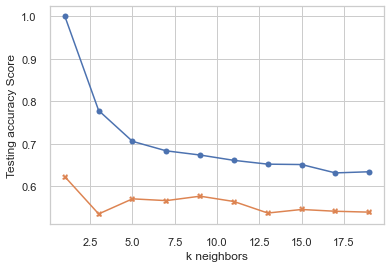

In [46]:
# below code from Linkedin Learning esercise

train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="X")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show();

### further tuning

In [17]:
leaf_size = list(range(1,50))
n_neighbors = list(range(1,9))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(X_train_scaled, y_train)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


Best leaf_size: 1
Best p: 2
Best n_neighbors: 1


In [47]:
from sklearn.preprocessing import MinMaxScaler

In [48]:
X2 = red_wines.drop(["quality",'citric acid','fixed acidity','residual sugar', 'chlorides', 'free sulfur dioxide','pH'], axis=1)
print(X2)
y2=red_wines['quality']

      volatile acidity  total sulfur dioxide  density  sulphates  alcohol
0                0.700                  34.0  0.99780       0.56      9.4
1                0.880                  67.0  0.99680       0.68      9.8
2                0.760                  54.0  0.99700       0.65      9.8
3                0.280                  60.0  0.99800       0.58      9.8
4                0.700                  34.0  0.99780       0.56      9.4
...                ...                   ...      ...        ...      ...
1594             0.600                  44.0  0.99490       0.58     10.5
1595             0.550                  51.0  0.99512       0.76     11.2
1596             0.510                  40.0  0.99574       0.75     11.0
1597             0.645                  44.0  0.99547       0.71     10.2
1598             0.310                  42.0  0.99549       0.66     11.0

[1599 rows x 5 columns]


In [49]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, random_state=42, test_size=.3)

In [51]:
X_scaler2= StandardScaler().fit(X_train2)
X_train_scaled2 = X_scaler2.transform(X_train2)
X_test_scaled2 = X_scaler2.transform(X_test2)

In [55]:
classifier2 = KNeighborsClassifier(n_neighbors = 1)
classifier2.fit(X_train_scaled2, y_train2)

predictions2 = classifier2.predict(X_test_scaled2)
print(predictions2)
print(classifier2.classes_)

[5 6 6 4 6 5 5 5 7 6 6 6 6 6 6 6 5 6 7 5 5 6 5 6 6 6 6 5 5 6 5 6 6 5 5 5 6
 6 6 7 5 5 6 5 5 6 7 6 5 4 5 5 6 7 5 4 6 6 6 5 5 6 6 6 6 6 6 5 7 6 6 5 6 6
 6 5 7 5 5 6 5 7 5 6 6 6 5 6 7 5 6 4 6 5 5 6 5 6 5 6 5 5 6 5 5 7 6 5 6 5 7
 5 7 5 5 6 5 5 5 5 6 6 3 6 6 5 7 5 5 6 6 6 5 7 4 5 5 6 5 5 7 6 7 4 5 5 5 6
 6 5 6 8 6 5 6 5 5 7 6 6 6 6 6 5 5 6 6 5 5 5 6 5 7 6 7 5 6 5 6 5 5 5 6 6 5
 6 6 5 7 6 6 6 5 6 5 5 3 6 5 7 5 6 5 6 7 5 5 6 6 5 8 5 5 8 7 4 6 5 6 5 5 6
 6 7 4 5 5 7 5 5 5 6 6 6 5 7 5 6 6 5 6 5 6 7 5 7 4 6 6 5 5 6 5 5 3 5 6 6 6
 6 7 5 5 6 6 6 5 5 6 6 5 6 6 6 5 6 4 6 5 6 7 5 5 4 7 7 5 6 5 6 5 7 7 5 5 6
 6 7 7 6 5 5 7 6 6 5 6 7 6 7 6 5 6 6 5 6 5 5 7 5 6 6 6 5 5 5 7 7 4 6 5 7 5
 6 6 6 6 6 5 6 7 6 6 4 6 5 6 5 6 6 5 6 5 6 6 6 6 5 5 5 6 5 5 6 5 7 6 5 5 5
 5 5 6 6 6 7 6 5 5 6 5 7 6 6 6 7 7 5 5 6 5 5 5 6 6 6 6 5 5 6 5 5 6 5 6 6 7
 7 6 5 6 6 6 5 5 6 6 7 6 7 7 5 6 5 6 6 5 5 5 6 7 6 5 5 7 5 6 5 5 6 5 6 7 5
 6 5 6 5 6 5 6 7 6 5 6 6 7 6 6 5 5 4 6 5 6 5 6 6 5 7 7 6 6 6 5 7 8 6 6 5]
[3 4 5 6 7 8]


In [56]:
print(f"Training Data Score: {classifier2.score(X_train_scaled2, y_train2)}")
print(f"Testing Data Score: {classifier2.score(X_test_scaled2, y_test2)}")

Training Data Score: 1.0
Testing Data Score: 0.6229166666666667


In [57]:
print(confusion_matrix(y_test2, predictions2))
print(classification_report(y_test2, predictions2))

[[  0   0   0   1   0   0]
 [  1   1  10   4   1   0]
 [  1   5 138  45   6   0]
 [  1   7  38 131  22   1]
 [  0   1   3  27  28   2]
 [  0   0   0   0   5   1]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.07      0.06      0.06        17
           5       0.73      0.71      0.72       195
           6       0.63      0.66      0.64       200
           7       0.45      0.46      0.46        61
           8       0.25      0.17      0.20         6

    accuracy                           0.62       480
   macro avg       0.36      0.34      0.35       480
weighted avg       0.62      0.62      0.62       480

